In [1]:
import numpy as np
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = '4'
plt.rcParams.update({'font.size': 20})

In [4]:
## Program 8.3
class GridSearch:
    def __init__(self,
                 amax = 100, NA = 1000, tol = 1e-6,
                β = 0.95, γ = 0.5, T = 200):
        self.amax = amax
        self.NA = NA
        self.tol = 1e-6
        self.β = 0.95
        self.γ = γ
        self.egam = 1-1/γ
        self.a = np.linspace(0, amax, NA)
        self.T = T
        self.V, self.c, self.loc = self.ValueFun()
        self.OutPut()
        
    def ValueFun(self, itermax = 1000):
        c = np.zeros(self.NA)
        V = np.zeros(self.NA) + 1e-4
        Vnew = V.copy()
        loc = np.zeros(self.NA, dtype = int)
        U = np.zeros(self.NA)
        
        def VF(v):
            for t in range(v):
                cons  = self.a[v]-self.a[t]
                U[t]  = cons**self.egam/self.egam + self.β*V[t]
            locc = np.argmax(U[:v])
            cc = self.a[v] - self.a[locc]
            VV = U[locc]
            return VV, cc, locc

        for i in range(itermax+1):
            Vnew[0] = V[1]- 100.0
            c[0] = 0.0
            results = Parallel(n_jobs=6)(delayed(VF)(v) for v in range(1,self.NA))
            for v in range(1,self.NA):
                Vnew[v] = results[v-1][0]
                c[v] = results[v-1][1]
                loc[v] = results[v-1][2]

            if np.max(abs((Vnew-V)/V)) < self.tol:
                break
            else:
                V = Vnew.copy()
                
        return V, c, loc
    
    def OutPut(self):
        NA, c, V, loc, a, β, γ, egam, T = self.NA, self.c, self.V, self.loc, self.a, self.β, self.γ, self.egam, self.T
        
        ct = np.zeros(T) 
        at = np.zeros(T) 
        pos = np.zeros(T, dtype=int) ##position
        pos[0] = NA-1 
        
        ct[0] = c[-1] #Numerical        
        for t in range(1,T):
            pos[t] = loc[pos[t-1]]
            ct[t] = c[pos[t]]

        cta = np.zeros(T) # Analytical
        at[0] = self.amax
        cta[0] = self.amax*(1-β**γ)
        for t in range(1,T):
            at[t] =  at[t-1]*β**γ
            cta[t] = at[t]*(1-β**γ)


        fig, axs = plt.subplots(2,2,figsize=(12,12))
        
        axs[0,0].plot(a, a*(1-β**γ),label = 'Analytical')
        axs[0,0].plot(a, c, label = 'Numerical')
        axs[0,0].set_ylabel('Policy function c(a)')
        axs[0,0].set_xlabel('Current level of resources a')
        axs[0,0].set_xlim(0,100)
        axs[0,0].set_ylim(0,3)

        axs[0,1].plot(a[10:],(1-β**γ)**(-1.0/γ)*a[10:]**egam/egam,label = 'Analytical')
        axs[0,1].plot(a[10:], V[10:], label = 'Numerical')
        axs[0,1].set_xlim(0,100)
        axs[0,1].set_ylim(-1600,0)
        axs[0,1].set_ylabel('Value function V(a)')
        axs[0,1].set_xlabel('Current level of resources a')

        TT = np.arange(T)
        axs[1,0].plot(TT, cta,label = 'Analytical')
        axs[1,0].plot(TT, ct, label = 'Numerical')
        axs[1,0].set_xlim(0,200)
        axs[1,0].set_ylim(0,3)
        axs[1,0].set_ylabel('Consumption c_t')
        axs[1,0].set_xlabel('Time t')
        
        for i in range(2):
            for j in range(2):
                if not (i==1 and j==1):
                    axs[i,j].legend(loc=0)

        fig.delaxes(axs[1,1])
        fig.tight_layout()

CPU times: user 1min 22s, sys: 3.62 s, total: 1min 26s
Wall time: 1min 26s


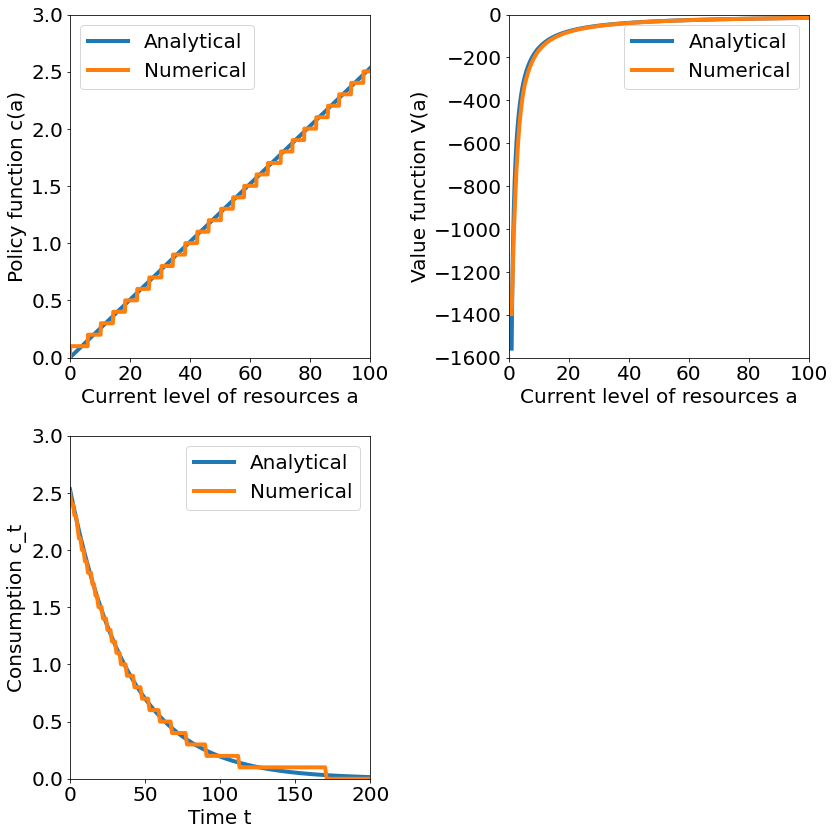

In [5]:
%time model = GridSearch()